## Task
to build a machine-learning model that can accurately classify
whether the personal loan was accepted or not based on the information provided.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_excel('Bank_loan_data.xlsx')

In [97]:
df.columns

Index(['ID', 'Age', 'Gender', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Home Ownership', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [98]:
# Rename columns: Replace spaces with underscores
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [99]:
df.columns

Index(['ID', 'Age', 'Gender', 'Experience', 'Income', 'ZIP_Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Home_Ownership', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP_Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home_Ownership      3811 non-null   object 
 11  Personal_Loan       5000 non-null   object 
 12  Securities_Account  5000 non-null   int64  
 13  CD_Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [101]:
df.head()

,ID,Age,Gender,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Home_Ownership,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home_Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [41]:
# Updated
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4999 non-null   int64  
 1   Experience                 4999 non-null   int64  
 2   Income                     4999 non-null   float64
 3   Family                     4999 non-null   int64  
 4   CCAvg                      4999 non-null   float64
 5   Education                  4999 non-null   int64  
 6   Mortgage                   4999 non-null   int64  
 7   Personal Loan              4999 non-null   object 
 8   Securities Account         4999 non-null   int64  
 9   CD Account                 4999 non-null   int64  
 10  Online                     4999 non-null   float64
 11  CreditCard                 4999 non-null   int64  
 12  Gender_M                   4999 non-null   bool   
 13  Gender_O                   4999 non-null   bool   
 1

In [42]:
df['Securities_Account'].unique()

array([1, 0])

In [43]:
df['CD_Account'].unique()

array([0, 1])

In [5]:
df['Gender'].unique()

array(['M', 'F', 'O', nan, '#', '-'], dtype=object)

In [6]:
df['Gender'].value_counts()

Gender
M    1677
F    1607
O      96
-      21
#       3
Name: count, dtype: int64

In [7]:
df['Gender'].isna().sum()

np.int64(1596)

In [8]:
df['Family'].unique()

array([4, 3, 1, 2])

In [9]:
df['Education'].unique()

array([1, 2, 3])

In [10]:
df['Home_Ownership'].unique()

array(['Home Owner', 'Rent', 'Home Mortage', nan], dtype=object)

In [11]:
home_ownership_counts = df['Home_Ownership'].value_counts()
print(home_ownership_counts)

Home Ownership
Home Mortage    1705
Home Owner      1156
Rent             950
Name: count, dtype: int64


In [12]:
df['Home_Ownership'].isna().sum()

np.int64(1189)

In [13]:
df['Securities_Account'].unique()

array([1, 0])

In [14]:
df['CD_Account'].unique()

array([0, 1])

In [15]:
df['Income'].isna().sum()

np.int64(67)

In [16]:
df['Online'].unique()

array([ 0.,  1., nan])

In [17]:
df['CreditCard'].unique()

array([0, 1])

In [18]:
personal_loan_count = df['Personal_Loan'].value_counts()
print(personal_loan_count)

Personal Loan
0    4520
1     479
        1
Name: count, dtype: int64


In [19]:
df['Personal_Loan'].unique()

array([0, 1, ' '], dtype=object)

In [20]:
df['Gender'].mode()

0    M
Name: Gender, dtype: object

In [21]:
df['Home_Ownership'].mode()

0    Home Mortage
Name: Home Ownership, dtype: object

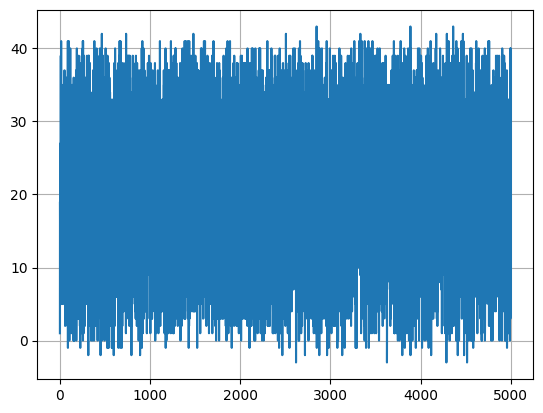

In [22]:
df['Experience'].plot().grid()

In [23]:
negative_experience_count = (df['Experience'] < 0).sum()
print(negative_experience_count)

52


## Starts Here

### 1. Handling Missing Values
#### a. Drop the Row with a Blank Target Value

In [102]:
# Since the target column 'Personal Loan' has one blank value, drop that row.
df = df[df['Personal_Loan'] != ' ']

#### b. Impute Missing Values
For Numerical Columns (Income, Online): Impute with the mean or median.

In [103]:
# Impute numerical columns
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Online'] = df['Online'].fillna(df['Online'].median())

For Categorical Columns (Gender, Home Ownership): Impute with the mode (most frequent value).

In [104]:
# Impute categorical columns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Home_Ownership'] = df['Home_Ownership'].fillna(df['Home_Ownership'].mode()[0])

### 2. Handle Unusual Values
#### a. Clean the `Gender` Column

Replace unusual values (`#`, `-`) with a default category like `Unknown`:

In [105]:
df['Gender'] = df['Gender'].replace(['#', '-'], 'Unknown')

#### b. Handle Negative Values in `Experience`
Negative values in the `Experience` column are likely errors. Replace them with 0 or the median value:

In [106]:
df['Experience'] = df['Experience'].apply(lambda x: 0 if x < 0 else x)

### 3. Encode Categorical Variables
Convert categorical columns (`Gender`, `Home Ownership`) into numerical values using **one-hot encoding**:

```python
pd.get_dummies(df, columns=['Gender', 'Home Ownerhsip'], drop_first=True)
```
* Converts **categorical columns** into **one-hot encoded** columns.
* One-hot encoding creates **binary (0 or 1) columns** for each unique category in these columns.
* `drop_first=True`: 

In [107]:
# df = pd.get_dummies(df, columns=['Gender', 'Home Ownership'], drop_first=False)

Why `drop_first=True`?
* Normally, `pd.get_dummies()` would create **three* columns for 'Home Ownership' (Rent, Home Owner, Home Mortgage).
* Since 'Rent' can be inferred when both other columns are `0`, dropping the first category avoids redundancy and reduces dimensionality.

In [108]:
df = pd.get_dummies(df, columns=['Gender', 'Home_Ownership'], drop_first=True)

In [109]:
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Gender_M,Gender_O,Gender_Unknown,Home_Ownership_Home_Owner,Home_Ownership_Rent
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0,True,False,False,True,False
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0,True,False,False,False,True
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0,True,False,False,False,True
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0,True,False,False,False,True
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1,True,False,False,False,True


In [110]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Gender_M', 'Gender_O',
       'Gender_Unknown', 'Home_Ownership_Home_Owner', 'Home_Ownership_Rent'],
      dtype='object')

### 4. Handle Class Imbalance
The target column (`Personal Loan`) is highly imbalanced (4520 `0`s vs. 479 `1`s). To address this:
* Use **resampling techniques** (oversampling the minority class or undersampling the majority class).
* Use **class weights** during model training.

In our case we are going to use **resampling techniques**.

#### a. Resampling (Oversampling Minority Class)
Use `SMOTE` (Synthetic Minority Oversampling Technique) to balance the dataset.

In [111]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Personal_Loan', 'ID', 'ZIP_Code'])  # Features
y = df['Personal_Loan'].astype(int)  # Target

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [112]:
X.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Gender_M', 'Gender_O', 'Gender_Unknown', 'Home_Ownership_Home_Owner',
       'Home_Ownership_Rent'],
      dtype='object')

### 5. Feature Engineering

#### a. Drop Irrelevant Columns
Drop columns like `ID` and `ZIP Code` that are unlikely to be useful for prediction.

In [113]:
df = df.drop(columns=['ID'])

#### b. Create New Features (Optional)
If domain knowledge suggests, create new features.
* Debt-to-Income Ratio: CCAVG/Income
* Savings Indicator: Securities Account + CD Account

In [39]:
# df['Debt_to_Income'] = df['CCAvg'] / df['Income']
# df['Savings_Indicator'] = df['Securities Account'] + df['CD Account']

In [114]:
df.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Gender_M,Gender_O,Gender_Unknown,Home_Ownership_Home_Owner,Home_Ownership_Rent
0,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0,True,False,False,True,False
1,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0,True,False,False,False,True
2,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0,True,False,False,False,True
3,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0,True,False,False,False,True
4,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1,True,False,False,False,True


In [44]:
# df = df.drop(columns=['Debt_to_Income', 'Savings_Indicator'])

In [45]:
# df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Gender_M,Gender_O,Gender_Unknown,Home Ownership_Home Owner,Home Ownership_Rent
0,25,1,49.0,4,1.6,1,0,0,1,0,0.0,0,True,False,False,True,False
1,45,19,34.0,3,1.5,1,0,0,1,0,0.0,0,True,False,False,False,True
2,39,15,11.0,1,1.0,1,0,0,0,0,0.0,0,True,False,False,False,True
3,35,9,100.0,1,2.7,2,0,0,0,0,0.0,0,True,False,False,False,True
4,35,8,45.0,4,1.0,2,0,0,0,0,0.0,1,True,False,False,False,True


#### 6. Split the Data
Split the data into training and testing sets:

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### 7. Train a Model
Use a classification algorithm like **Logistic Regression**, **Random Forest**, or **XGBoost**. 

In [116]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 8. Evaluate the Model
Evaluate the model using metrics suitable for imbalanced data, such as:
* **Precision, Recall, F1-Score**
* **ROC-AUC Score**
* **Confusion Matrix**

In [117]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       921
           1       0.98      0.99      0.98       887

    accuracy                           0.98      1808
   macro avg       0.98      0.98      0.98      1808
weighted avg       0.98      0.98      0.98      1808

ROC-AUC Score: 0.9988640355870231
Confusion Matrix:
 [[899  22]
 [  7 880]]


In [118]:
joblib.dump(model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

#### 9. Hyperparameter Tuning
Use techniques like **GridSearchCV** or **RandomizedSearchCV** to optimize hyperparameters.

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [53]:
model2 = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=300)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [54]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))
print("ROC-AUC Score:", roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       921
           1       0.97      0.98      0.97       887

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808

ROC-AUC Score: 0.9972990242702224
Confusion Matrix:
 [[893  28]
 [ 19 868]]


In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2).T)

Confusion Matrix:
 [[893  19]
 [ 28 868]]


In [56]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                      Feature  Importance
2                      Income    0.349924
5                       CCAvg    0.225559
6                   Education    0.068851
10                     Online    0.062146
4                      Family    0.045273
3                    ZIP Code    0.036236
16        Home Ownership_Rent    0.035048
15  Home Ownership_Home Owner    0.033481
7                    Mortgage    0.032622
1                  Experience    0.025999
0                         Age    0.025657
13                   Gender_O    0.021823
11                 CreditCard    0.013555
12                   Gender_M    0.009784
9                  CD Account    0.009082
8          Securities Account    0.004863
14             Gender_Unknown    0.000096


In [57]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Load the dataset
df = pd.read_excel('Bank_loan_data.xlsx')

# Rename columns (replace whitespace with '_')
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# Drop unnecessary columns
df = df.drop(columns=['ID', 'ZIP_Code'])

# Replace unusual values in the 'Gender' column
df['Gender'] = df['Gender'].replace(['#', '-'], 'Unknown')

# Replace blank values in the 'Personal Loan' column
df = df[df['Personal_Loan'] != ' ']

# Convert negative values in the 'Experience' column to 0
df['Experience'] = df['Experience'].apply(lambda x: 0 if x < 0 else x)

# Separate features and target
X = df.drop(columns=['Personal_Loan'])
y = df['Personal_Loan'].astype(int)  # Convert target to integer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Online']
categorical_features = ['Gender', 'Home_Ownership']

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Impute missing values with median
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with SMOTE
pipeline = make_imb_pipeline(
    preprocessor,  # Preprocessing steps
    SMOTE(random_state=42),  # Apply SMOTE to balance the classes
    RandomForestClassifier(random_state=42)  # Classifier
)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'loan_approval_pipeline.pkl')

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       902
           1       0.75      0.49      0.59        98

    accuracy                           0.93      1000
   macro avg       0.85      0.74      0.78      1000
weighted avg       0.93      0.93      0.93      1000

ROC-AUC Score:
0.9641895560885108
Confusion Matrix:
 [[886  16]
 [ 50  48]]


['loan_approval_pipeline.pkl']